In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# read csv files
df_emp = pd.read_csv('../../Data/Downloaded_Old/post_emp.csv')
df_GDP = pd.read_csv('../../Data/Downloaded_Old/post_GDP.csv')
df_cns = pd.read_csv('../../Data/Downloaded_Old/post_real_cns.csv')
df_temp = pd.read_csv('test1.csv')

In [135]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.66
α_LM  = 0.34
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [136]:
df_cns = df_cns.merge(df_temp, on= 'year_wst')

In [137]:
# create the ratio of marginal utility
df_cns['cA-γ/cM'] = (df_cns['real_food_cns'] - γ_post) / df_cns['real_non_food_cns']
df_cns['mu_M/mu_A'] = (1-η) / η * df_cns['cA-γ/cM']

In [138]:
df_cns.columns

Index(['year_jpn', 'year_wst', 'real_tot_cns', 'real_food_cns',
       'real_non_food_cns', 'Unnamed: 0', 'cA-gammaA/cM_nom',
       'cA-gammaA/cM_real', 'cA-γ/cM', 'mu_M/mu_A'],
      dtype='object')

In [139]:
# create the ratio of marginal utility
df_cns['mu_M/mu_A_nom'] = (1-η) / η * df_cns['cA-gammaA/cM_nom']
df_cns['mu_M/mu_A_real'] = (1-η) / η * df_cns['cA-gammaA/cM_real']

In [140]:
df_GDP_emp = pd.merge(df_GDP, df_emp, on = 'year_wst')

In [141]:
df_GDP_emp_picked = df_GDP_emp[['year_wst', 'prm_GDP', 'non_prm_GDP', 'prm_emp', 'non_prm_emp']].copy()

In [142]:
df_GDP_emp_picked['F_LA'] = α_LA * df_GDP_emp_picked['prm_GDP'] / df_GDP_emp_picked['prm_emp'] 

In [143]:
df_GDP_emp_picked['F_LM'] = α_LM * df_GDP_emp_picked['non_prm_GDP'] / df_GDP_emp_picked['non_prm_emp'] 

In [144]:
# get the ratio of labor productivity
df_GDP_emp_picked['F_LM/F_LA'] = df_GDP_emp_picked['F_LM'] / df_GDP_emp_picked['F_LA']

In [145]:
df_merged = pd.merge(df_GDP_emp_picked[['year_wst', 'F_LM/F_LA']], 
                    df_cns[['year_wst', 'mu_M/mu_A', 'mu_M/mu_A_nom', 'mu_M/mu_A_real']], on = 'year_wst')

In [146]:
df_merged['norm_labor_wedge'] = df_merged['mu_M/mu_A'] * df_merged['F_LM/F_LA']

In [147]:
df_merged['norm_labor_wedge_nom'] = df_merged['mu_M/mu_A_nom'] * df_merged['F_LM/F_LA']

In [148]:
df_merged['norm_labor_wedge_real'] = df_merged['mu_M/mu_A_real'] * df_merged['F_LM/F_LA']

In [149]:
df_merged['norm_labor_wedge-1'] = df_merged['norm_labor_wedge'] - 1

In [150]:
df_merged['norm_labor_wedge-1_nom'] = df_merged['norm_labor_wedge_nom'] - 1

In [151]:
df_merged['norm_labor_wedge-1_real'] = df_merged['norm_labor_wedge_real'] - 1

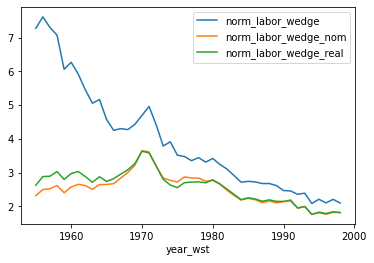

In [152]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'norm_labor_wedge', ax = ax)
df_merged.plot(x = 'year_wst', y = 'norm_labor_wedge_nom', ax = ax)
df_merged.plot(x = 'year_wst', y = 'norm_labor_wedge_real', ax = ax)
plt.legend()

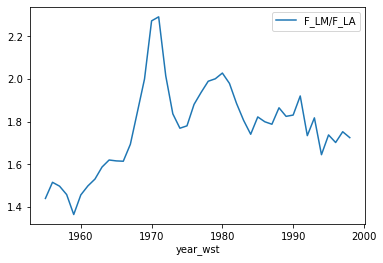

In [153]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'F_LM/F_LA', ax = ax)
plt.legend()

In [154]:
df_merged.to_csv('../../Data/Results/post_lab_w.csv', index = False)

In [155]:
df_merged.loc[0:4]['norm_labor_wedge-1'].mean()

6.064908700598873

In [156]:
df_merged

,year_wst,F_LM/F_LA,mu_M/mu_A,mu_M/mu_A_nom,mu_M/mu_A_real,norm_labor_wedge,norm_labor_wedge_nom,norm_labor_wedge_real,norm_labor_wedge-1,norm_labor_wedge-1_nom,norm_labor_wedge-1_real
0,1955,1.440974,5.048960,1.606637,1.819697,7.275421,2.315123,2.622136,6.275421,1.315123,1.622136
1,1956,1.516542,5.021302,1.645309,1.898992,7.615016,2.495180,2.879902,6.615016,1.495180,1.879902
2,1957,1.498335,4.871797,1.683306,1.929842,7.299585,2.522156,2.891549,6.299585,1.522156,1.891549
3,1958,1.459007,4.848288,1.791515,2.075550,7.073686,2.613833,3.028242,6.073686,1.613833,2.028242
4,1959,1.365606,4.438202,1.758375,2.048381,6.060836,2.401247,2.797281,5.060836,1.401247,1.797281
5,1960,1.457397,4.300208,1.764601,2.038579,6.267110,2.571724,2.971019,5.267110,1.571724,1.971019
6,1961,1.499553,3.945175,1.767988,2.020670,5.915998,2.651192,3.030101,4.915998,1.651192,2.030101
7,1962,1.531659,3.559061,1.706367,1.879219,5.451268,2.613573,2.878323,4.451268,1.613573,1.878323
8,1963,1.588098,3.182724,1.575492,1.708163,5.054476,2.502036,2.712730,4.054476,1.502036,1.712730
9,1964,1.620990,3.186548,1.630246,1.773415,5.165364,2.642613,2.874689,4.165364,1.642613,1.874689
